Name : Sanjeev Kumar Khatri

Roll no : 23

Group : CS

Assignment : 08

Githublink : https://github.com/darkamgel/machinelearning-LAB

Practical Assignment - 8

1. Deep Learning with Convolution Neural Networks 
2. Building a perceptron-based linear regressor 
3. Building an image classifier using a single layer neural network 
4. Building an image classifier using a Convolution Neural Network 
5. CNN on CIFAR10 Dataset 
6. CNN on MNIST Dataset 
7. Visualization of Layers

books :
   Chapter 16 – Artificial Intelligence with 
Python 


  Chapter 6 – Mastering Machine Learning 
with Python in Six Steps



#Convolution Neural Networks

Neural networks consist of neurons that have weights and biases. These weights and biases are tuned during the training process to come up with a good learning model. Each neuron receives a set of inputs, processes it in some way, and then outputs a value.

If we build a neural network with many layers, it's called a deep neural network. The branch of Artificial Intelligence dealing with these deep neural networks is referred to as deep learning.

One of the main disadvantages of ordinary neural networks is that they ignore the structure of input data. All data is converted to a single dimensional array before feeding it into the network. This works well for regular data, but things get difficult when we deal with images.

Let's consider grayscale images. These images are 2D structures and we know that the spatial arrangement of pixels has a lot of hidden information. If we ignore this information, we will be losing a lot of underlying patterns. This is where Convolutional Neural Networks (CNNs) come into the picture. CNNs take the 2D structure of the images into account when they process them.

CNNs are also made up of neurons consisting of weights and biases. These neurons accept input data, process it, and then output something. The goal of the network is to go from the raw image data in the input layer to the correct class in the output layer. The difference between ordinary neural networks and CNNs is in the type of layers we use and how we treat the input data. CNNs assume that the inputs are images, which allows them to extract properties specific to images. This makes CNNs way more efficient in dealing with images. Let's see how CNNs are built.



## Types of layers in a CNN
1. Input layer: This layer takes the raw image data as it is.

2. Convolutional layer: This layer computes the convolutions between the neurons and the various patches in the input. If we need a quick refresher on image convolutions, we can check out this link:
http://web.pdx.edu/~jduh/courses/Archive/geog481w07/Students/Ludwig_Im ageConvolution.pdf. The convolutional layer basically computes the dot product between the weights and a small patch in the output of the previous layer. 

3. Rectified Linear Unit layer: This layer applies an activation function to the output of the previous layer. This function is usually something like max(0, x). This layer is needed to add non-linearity to the network so that it can generalize well to any type of function.

4. Pooling layer: This layer samples the output of the previous layer resulting in a structure with smaller dimensions. Pooling helps us to keep only the prominent parts as we progress in the network. Max pooling is frequently used in the pooling layer where we pick the maximum value in a given KxK window.

5. Fully Connected layer: This layer computes the output scores in the last layer. The resulting output is of the size 1x1xL, where L is the number of classes in the training dataset.

# Building a perceptron-based linear regressor

We will be using TensorFlow . It is a popular deep learning package that's widely used to build various real world systems. In this , we will get familiar with how it works. 

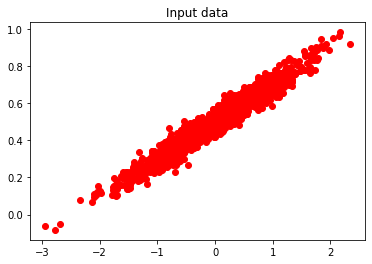


ITERATION 1
W = 0.0052277744
b = 0.49469915
loss = 0.027376639


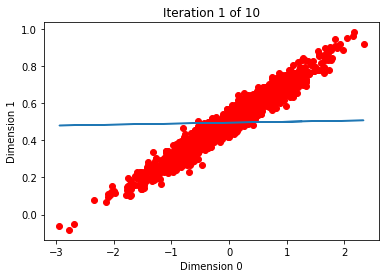


ITERATION 2
W = 0.13771684
b = 0.49820808
loss = 0.004169562


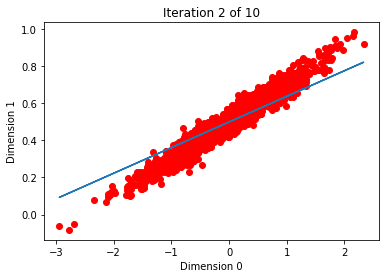


ITERATION 3
W = 0.18026623
b = 0.49937236
loss = 0.0017758725


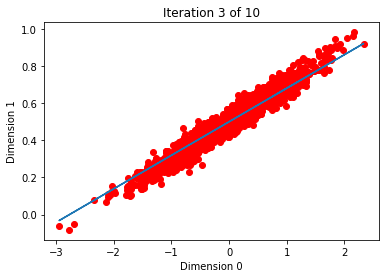


ITERATION 4
W = 0.19393148
b = 0.4997463
loss = 0.0015289756


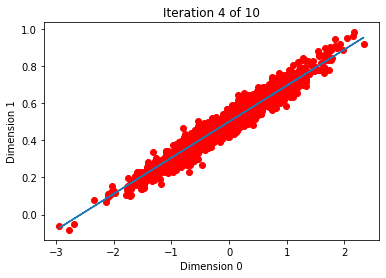


ITERATION 5
W = 0.19832022
b = 0.4998664
loss = 0.0015035094


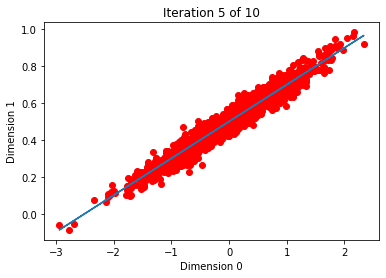


ITERATION 6
W = 0.19972973
b = 0.49990496
loss = 0.0015008827


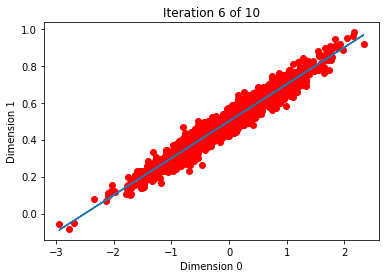


ITERATION 7
W = 0.20018241
b = 0.49991733
loss = 0.0015006117


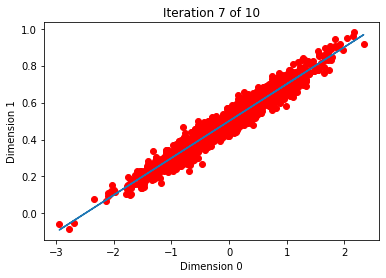


ITERATION 8
W = 0.20032778
b = 0.49992132
loss = 0.0015005838


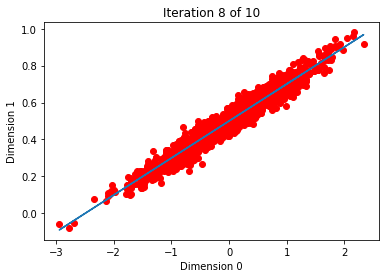


ITERATION 9
W = 0.20037448
b = 0.4999226
loss = 0.0015005809


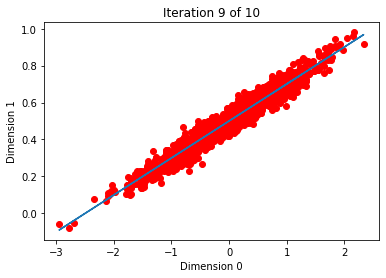


ITERATION 10
W = 0.20038947
b = 0.499923
loss = 0.0015005807


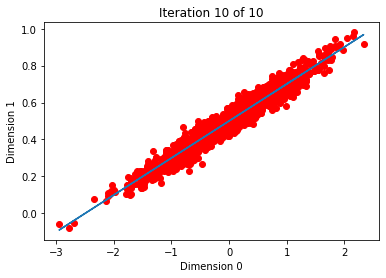

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# generating some datapoints and see how we can fit a model to it. Define the number of datapoints to be generated:
# # Define the number of points to generate

num_points = 1200

# Generate the data based on equation y = mx + c

data = []
m = 0.2
c = 0.5
for i in range(num_points):
   # Generate 'x'
    x = np.random.normal(0.0, 0.8)
  # Generate some noise
    noise = np.random.normal(0.0, 0.04)
  # Compute 'y'
    y = m*x + c + noise 

    data.append([x, y])

# Separate x and y
x_data = [d[0] for d in data]
y_data = [d[1] for d in data]


# Plot the generated data
plt.plot(x_data, y_data, 'ro')
plt.title('Input data')
plt.show()

# Generate weights and biases
W = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))

# Define equation for 'y'
y = W * x_data + b

# Define how to compute the loss
loss = tf.reduce_mean(tf.square(y - y_data))

 # Define the gradient descent optimizer
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# Initialize all the variables
init = tf.initialize_all_variables()

# Start the tensorflow session and run it
sess = tf.Session()
sess.run(init)

# Start iterating
num_iterations = 10
for step in range(num_iterations):
    sess.run(train)
  # Print the progress
    print('\nITERATION', step+1)
    print('W =', sess.run(W)[0])
    print('b =', sess.run(b)[0])
    print('loss =', sess.run(loss))
     # Plot the input data
    plt.plot(x_data, y_data, 'ro')
     # Plot the predicted output line
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
    # Set plotting parameters
    plt.xlabel('Dimension 0')
    plt.ylabel('Dimension 1')
    plt.title('Iteration ' + str(step+1) + ' of ' + str(num_iterations))
    plt.show()

# Building an image classifier using a single layer neural network

Let's see how to create a single layer neural network using TensorFlow and use it to build an image classifier. We will be using MNIST image dataset to build our system. It is dataset containing handwritten images of digits. Our goal is to build a classifier that can correctly identify the digit in each image

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
import plotly
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
shape of x_train:  (60000, 28, 28)
shape of x_test:  (10000, 28, 28)


The images in the database are 28 x 28. We need to convert it to a single dimensional array to create the input layer:

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [7]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59264/60000 [============================>.] - ETA: 0s - loss: 0.2983 - acc: 0.9143

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


60000/60000 [==============================] - 6s 108us/sample - loss: 0.2969 - acc: 0.9147 - val_loss: 0.1385 - val_acc: 0.9578
Epoch 2/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1405 - acc: 0.9578 - val_loss: 0.1004 - val_acc: 0.9713
Epoch 3/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1069 - acc: 0.9680 - val_loss: 0.0929 - val_acc: 0.9711
Epoch 4/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0876 - acc: 0.9731 - val_loss: 0.0803 - val_acc: 0.9750
Epoch 5/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0738 - acc: 0.9768 - val_loss: 0.0712 - val_acc: 0.9783
Epoch 6/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0650 - acc: 0.9794 - val_loss: 0.0720 - val_acc: 0.9784
Epoch 7/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0578 - acc: 0.9810 - val_loss: 0.0674 - val_acc: 0.9806
Epoch 8/10
60000/60000 [=============

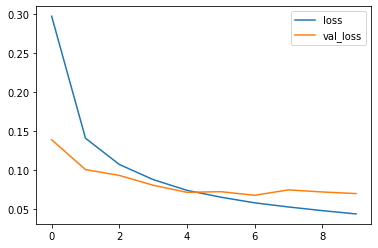

In [9]:
plt.plot(r.history['loss'], label= 'loss')
plt.plot(r.history['val_loss'], label= 'val_loss')
plt.legend();

In [10]:
print(model.evaluate(x_test, y_test))

[0.06962814866753761, 0.9803]


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Confusion matrix without normalization
[[ 967    0    1    3    0    1    3    3    1    1]
 [   0 1129    2    1    0    0    1    0    2    0]
 [   1    1 1012    2    1    0    2    6    6    1]
 [   0    0    4  990    0    6    0    6    3    1]
 [   1    0    2    0  964    0    3    4    1    7]
 [   2    0    0    6    1  874    2    1    4    2]
 [   3    3    1    1    5    6  938    0    1    0]
 [   1    2    4    2    0    0    0 1014    0    5]
 [   6    1    3    4    4    7    0    8  938    3]
 [   1    4    0    5    6    6    1    8    1  977]]


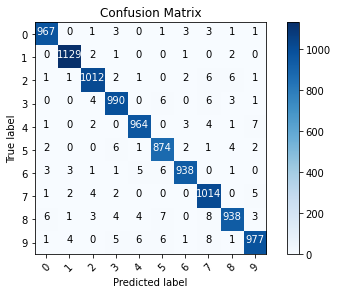

In [11]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title="Confusion Matrix",
                          cmap = plt.cm.Blues):
  
  """
  This function prints and plots the confusion matrix.
  Normalize can be applied by setting 'normalize = True'
  """
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  
  else:
    print("Confusion matrix without normalization")
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = 'center',
             color = "white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

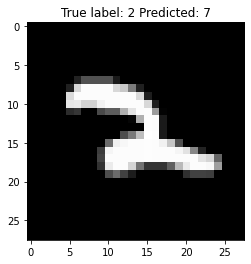

In [12]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap= 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

#CNN on CIFAR10 Dataset 

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [14]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [15]:
X_train.shape , X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [16]:
X_train[0].shape

(28, 28)

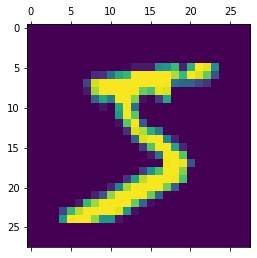

In [17]:
plt.matshow(X_train[0])

In [18]:
y_train[0]

5

In [19]:
X_train = X_train / 255
X_test = X_test / 255

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2733 - acc: 0.9229
Epoch 2/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.1218 - acc: 0.9644
Epoch 3/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0855 - acc: 0.9745
Epoch 4/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0642 - acc: 0.9799
Epoch 5/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0514 - acc: 0.9847
Epoch 6/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0404 - acc: 0.9876
Epoch 7/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0336 - acc: 0.9894
Epoch 8/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0276 - acc: 0.9916
Epoch 9/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0229 - acc: 0.9930
Epoch 10/10
60000/60000 [==============================] - 

In [20]:
model.evaluate(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


[0.08529447794380395, 0.9779]

In [21]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [22]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [23]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 237us/sample - loss: 0.1634 - acc: 0.9516
Epoch 2/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0572 - acc: 0.9822
Epoch 3/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0373 - acc: 0.9883
Epoch 4/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0262 - acc: 0.9919
Epoch 5/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0188 - acc: 0.9940


In [25]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [26]:
model.evaluate(X_test,y_test)

[0.052538299112080133, 0.9852]

loading data

In [27]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 14s 0us/step


(50000, 32, 32, 3)

In [29]:
X_test.shape , y_train.shape

((10000, 32, 32, 3), (50000, 1))

In [30]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

reshaping 

In [31]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [32]:
y_test = y_test.reshape(-1,)

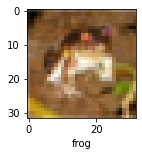

In [34]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

plot_sample(X_train, y_train, 0)

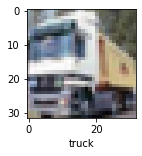

In [35]:
plot_sample(X_train, y_train, 1)

In [36]:
X_train = X_train / 255.0
X_test = X_test / 255.0

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
cnn.fit(X_train, y_train, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 7s 143us/sample - loss: 1.4451 - acc: 0.4811
Epoch 2/10
50000/50000 [==============================] - 8s 159us/sample - loss: 1.0945 - acc: 0.6183
Epoch 3/10
50000/50000 [==============================] - 7s 144us/sample - loss: 0.9603 - acc: 0.6685
Epoch 4/10
50000/50000 [==============================] - 7s 147us/sample - loss: 0.8701 - acc: 0.6977
Epoch 5/10
50000/50000 [==============================] - 6s 118us/sample - loss: 0.7975 - acc: 0.7245
Epoch 6/10
50000/50000 [==============================] - 6s 114us/sample - loss: 0.7378 - acc: 0.7436
Epoch 7/10
50000/50000 [==============================] - 6s 114us/sample - loss: 0.6826 - acc: 0.7615
Epoch 8/10
50000/50000 [==============================] - 6s 113us/sample - loss: 0.6370 - acc: 0.7769
Epoch 9/10
50000/50000 [==============================] - 6s 115us/sample - loss: 0.5921 - acc: 0.7921
Epoch 10/10
50000/50000 [=========================

In [38]:
cnn.evaluate(X_test,y_test)

[0.897847674369812, 0.7102]

In [39]:
y_pred = cnn.predict(X_test)
y_pred[:5]

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


array([[7.61481992e-04, 6.74030525e-05, 2.96022714e-04, 5.06215453e-01,
        2.76396342e-04, 4.50215071e-01, 4.13721986e-02, 4.43889912e-05,
        3.97844327e-04, 3.53709416e-04],
       [5.82329929e-03, 1.24759026e-01, 1.38634664e-06, 7.31314913e-06,
        1.23541633e-06, 2.57890690e-07, 6.56780117e-07, 2.39851374e-07,
        8.65018249e-01, 4.38833749e-03],
       [4.72952835e-02, 3.24743718e-01, 4.38968564e-04, 3.07331420e-03,
        2.51780264e-04, 1.05179637e-03, 3.48139904e-03, 7.14948308e-03,
        6.00117683e-01, 1.23966122e-02],
       [9.25400734e-01, 1.37653323e-02, 4.23663761e-03, 3.80001402e-05,
        6.25086133e-04, 1.04708329e-06, 1.17845368e-04, 1.92958083e-07,
        5.50669059e-02, 7.48155231e-04],
       [2.50323815e-08, 1.99933687e-08, 2.78607477e-03, 2.12444575e-03,
        5.18640764e-02, 4.28084168e-05, 9.43181574e-01, 1.42723815e-08,
        1.00618820e-06, 8.25943314e-09]], dtype=float32)

In [40]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

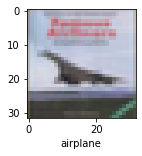

In [41]:
plot_sample(X_test, y_test,3)